<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/DailyChallenge_week4_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import and Cleaning

Work with the “Airplane Crashes and Fatalities upto 2023” dataset, which provides comprehensive details about airplane crashes, including dates, locations, fatalities, and more.

In [30]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding="ISO-8859-1")


# Display the first few rows
print(df.head())




        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

In [55]:
# Display missing values count
print(df.isna().mean().sort_values(ascending=False))


Date                     0.0
Time                     0.0
Location                 0.0
Operator                 0.0
Flight #                 0.0
Route                    0.0
Registration             0.0
Aboard                   0.0
Aboard Passangers        0.0
Aboard Crew              0.0
Fatalities               0.0
Fatalities Passangers    0.0
Fatalities Crew          0.0
Ground                   0.0
Summary                  0.0
dtype: float64


In [73]:
# Fill missing categorical values!
df['Fatalities Passangers'] = df['Fatalities Passangers'].fillna('Unknown')
df['Fatalities Crew'] = df['Fatalities Crew'].fillna('Unknown')
df['Aboard Passangers'] = df['Aboard Passangers'].fillna('Unknown')
df['Aboard Crew'] = df['Aboard Crew'].fillna('Unknown')
df['Ground'] = df['Ground'].fillna('Unknown')
df['Aboard'] = df['Aboard'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')


# convert to num
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')

In [58]:
df.dtypes

,0
Date,datetime64[ns]
Time,object
Location,object
Operator,object
Flight #,object
Route,object
Registration,object
Aboard,object
Aboard Passangers,object
Aboard Crew,object


#Exploratory Data Analysis

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

In [75]:
# total number of crashes
total_crashes = df.shape[0] #Number of lines (number of disasters)


#total fatality
total_fatalities = df['Fatalities'].sum()

#amount of people on the bord
total_aboard = df['Aboard'].sum()


# survival rates
survival_rate = (total_aboard - total_fatalities) / total_aboard


print("Total number of crashes:", total_crashes)
print("Total number of fatalities:", total_fatalities)
print("Total number of people on board:", total_aboard)
print("Survival rate:", survival_rate) # 28%




Total number of crashes: 4998
Total number of fatalities: 111644.0
Total number of people on board: 155356.0
Survival rate: 0.2813666675249105


Analyze the frequency of crashes over time to identify any trends.

Year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2019    13
2020     8
2021     9
2022     6
2023     4
Name: count, Length: 113, dtype: int64


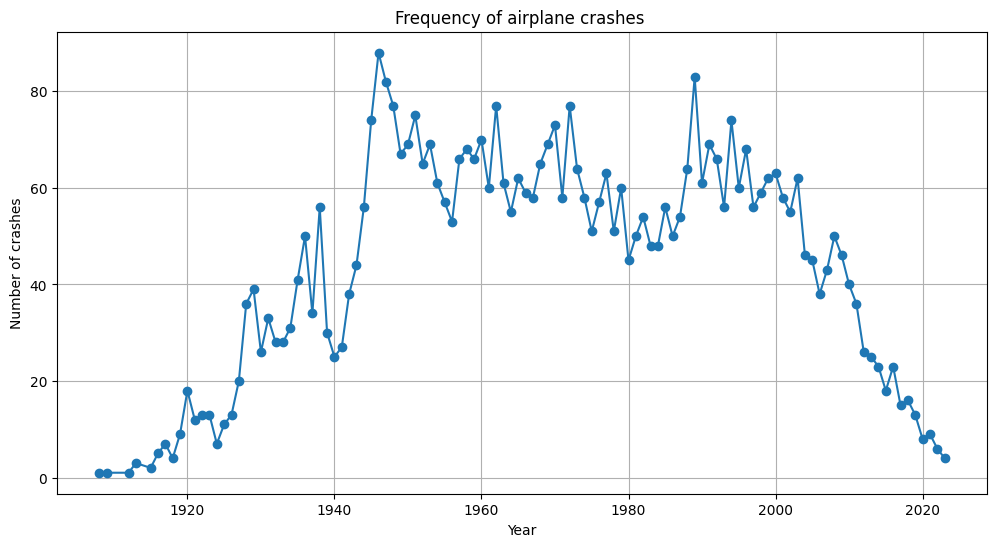

In [83]:
import matplotlib.pyplot as plt

df['Year'] = df['Date'].dt.year  # extract year from Date
freq_crashes_per_year = df['Year'].value_counts().sort_index()

print(freq_crashes_per_year)


# draw a plot
plt.figure(figsize=(12, 6))
plt.plot(freq_crashes_per_year.index, freq_crashes_per_year.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.title("Frequency of airplane crashes ")
plt.grid(True)
plt.show()

After 2000 we observe the decline in airplane crashes is observed

#Statistical Analysis

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.